程式碼節錄:AI大現場專業團隊版權所有

In [148]:
!pip install pytrends
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [149]:
from pytrends.request import TrendReq
import pandas as pd

#找出台灣地區，2022-01-01到2022-06-01期間，「手機殼」一詞的建議關鍵字。

In [150]:
#找出台灣地區，2022-01-01到2022-06-01期間，「手機殼」一詞的建議關鍵字。
from pytrends.request import TrendReq
import pandas as pd
pytrends = TrendReq(hl='TW',tz=360)
kw_list = '手機殼'
pytrends.build_payload(kw_list,cat=0,timeframe='2022-01-01 2022-06-01',geo='TW',gprop='')
keywords = pytrends.suggestions(kw_list)
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')

,title,type
0,Mobile Phone Case,Topic
1,Mobile phone accessories,Topic
2,Phone Case DIY,Mobile game
3,Toyselect 拓伊生活｜手機殼獨家設計,Topic
4,DEVILCASE-台南北門加盟店【惡魔防摔手機殼/保護貼/手機包膜/3C週邊配件】,"Cell phone accessory store in Tainan, Taiwan"


In [151]:
#五個手機殼品牌比較，過去半年
from pytrends.request import TrendReq
# Only need to run this once, the rest of requests will use the same session.
pytrends = TrendReq(hl='TW',tz=360)

kw_list = ['犀牛盾','UAG','CASETiFY','DEVILCASE','bitplay']
pytrends.build_payload(kw_list,cat=0,timeframe='2022-01-01 2022-06-01',geo='TW',gprop='')
df = pytrends.interest_over_time()
df = df.drop('isPartial',axis=1)
df.to_csv('pytrend_interest.csv', encoding='utf_8_sig')
df

,犀牛盾,UAG,CASETiFY,DEVILCASE,bitplay
date,,,,,
2022-01-01,48,10,7,12,0
2022-01-02,59,7,11,8,3
2022-01-03,43,15,25,13,0
2022-01-04,50,5,13,4,1
2022-01-05,65,5,18,11,1
...,...,...,...,...,...
2022-05-28,45,7,20,5,0
2022-05-29,35,9,19,7,1
2022-05-30,34,4,19,4,1


In [157]:
#視覺呈現：「五個手機殼品牌」媒體搜尋量比較
import plotly.express as px 
fig=px.line(df, x=df.index,y=df.columns,template="seaborn")
# Available templates: ['ggplot2','seaborn','simple_white', 'plotly','plotly_white', 'plotly_dark', 'presentation', 'xgridoff', 'ygridoff', 'gridon', 'none']

#fig.update_xaxes(title_text='日期')
#fig.update_yaxes(title_text='網路聲量數')
fig.update_layout(hovermode="x unified")

fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=10,
        font_family="Arial"
    )
)
    
fig.update_layout(
    title="台灣地區 五大手機殼品牌 媒體搜尋量比較",
    xaxis_title="日期",
    yaxis_title="Y Axis Title",
    legend_title="網路聲量數",
    font=dict(
        family="Arial",
        size=18,
        color="darkred"
    )
)   
    
fig.update_layout(
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

fig.show(renderer="colab")

TypeError: ignored

In [153]:
import pandas as pd 
from pytrends.request import TrendReq
kw_list = ['Rhinoshield','UAG','CASETiFY','DEVILCASE','bitplay']
pytrends = TrendReq()

#按國家搜尋，若搜尋度較高，代表潛在顧客多，可按搜尋數量多的國家擴展生意

In [155]:
#按國家搜尋，若搜尋度較高，代表潛在顧客多，可按搜尋數量多的國家擴展生意
#結果如下：
pytrends.get_historical_interest(kw_list)

df4_ibr = pytrends.interest_by_region(resolution='COUNTRY') # CITY, COUNTRY or REGION
df4_ibr.sort_values('Rhinoshield', ascending=False).head(40)

,Rhinoshield,UAG,CASETiFY,DEVILCASE,bitplay
geoName,,,,,
Réunion,100,0,0,0,0
Brunei,100,0,0,0,0
France,91,7,2,0,0
Belgium,75,12,13,0,0
Austria,67,33,0,0,0
Finland,50,50,0,0,0
Slovakia,50,50,0,0,0
Sweden,40,40,20,0,0
Germany,40,32,28,0,0


Text(0, 0.5, 'Ranking')

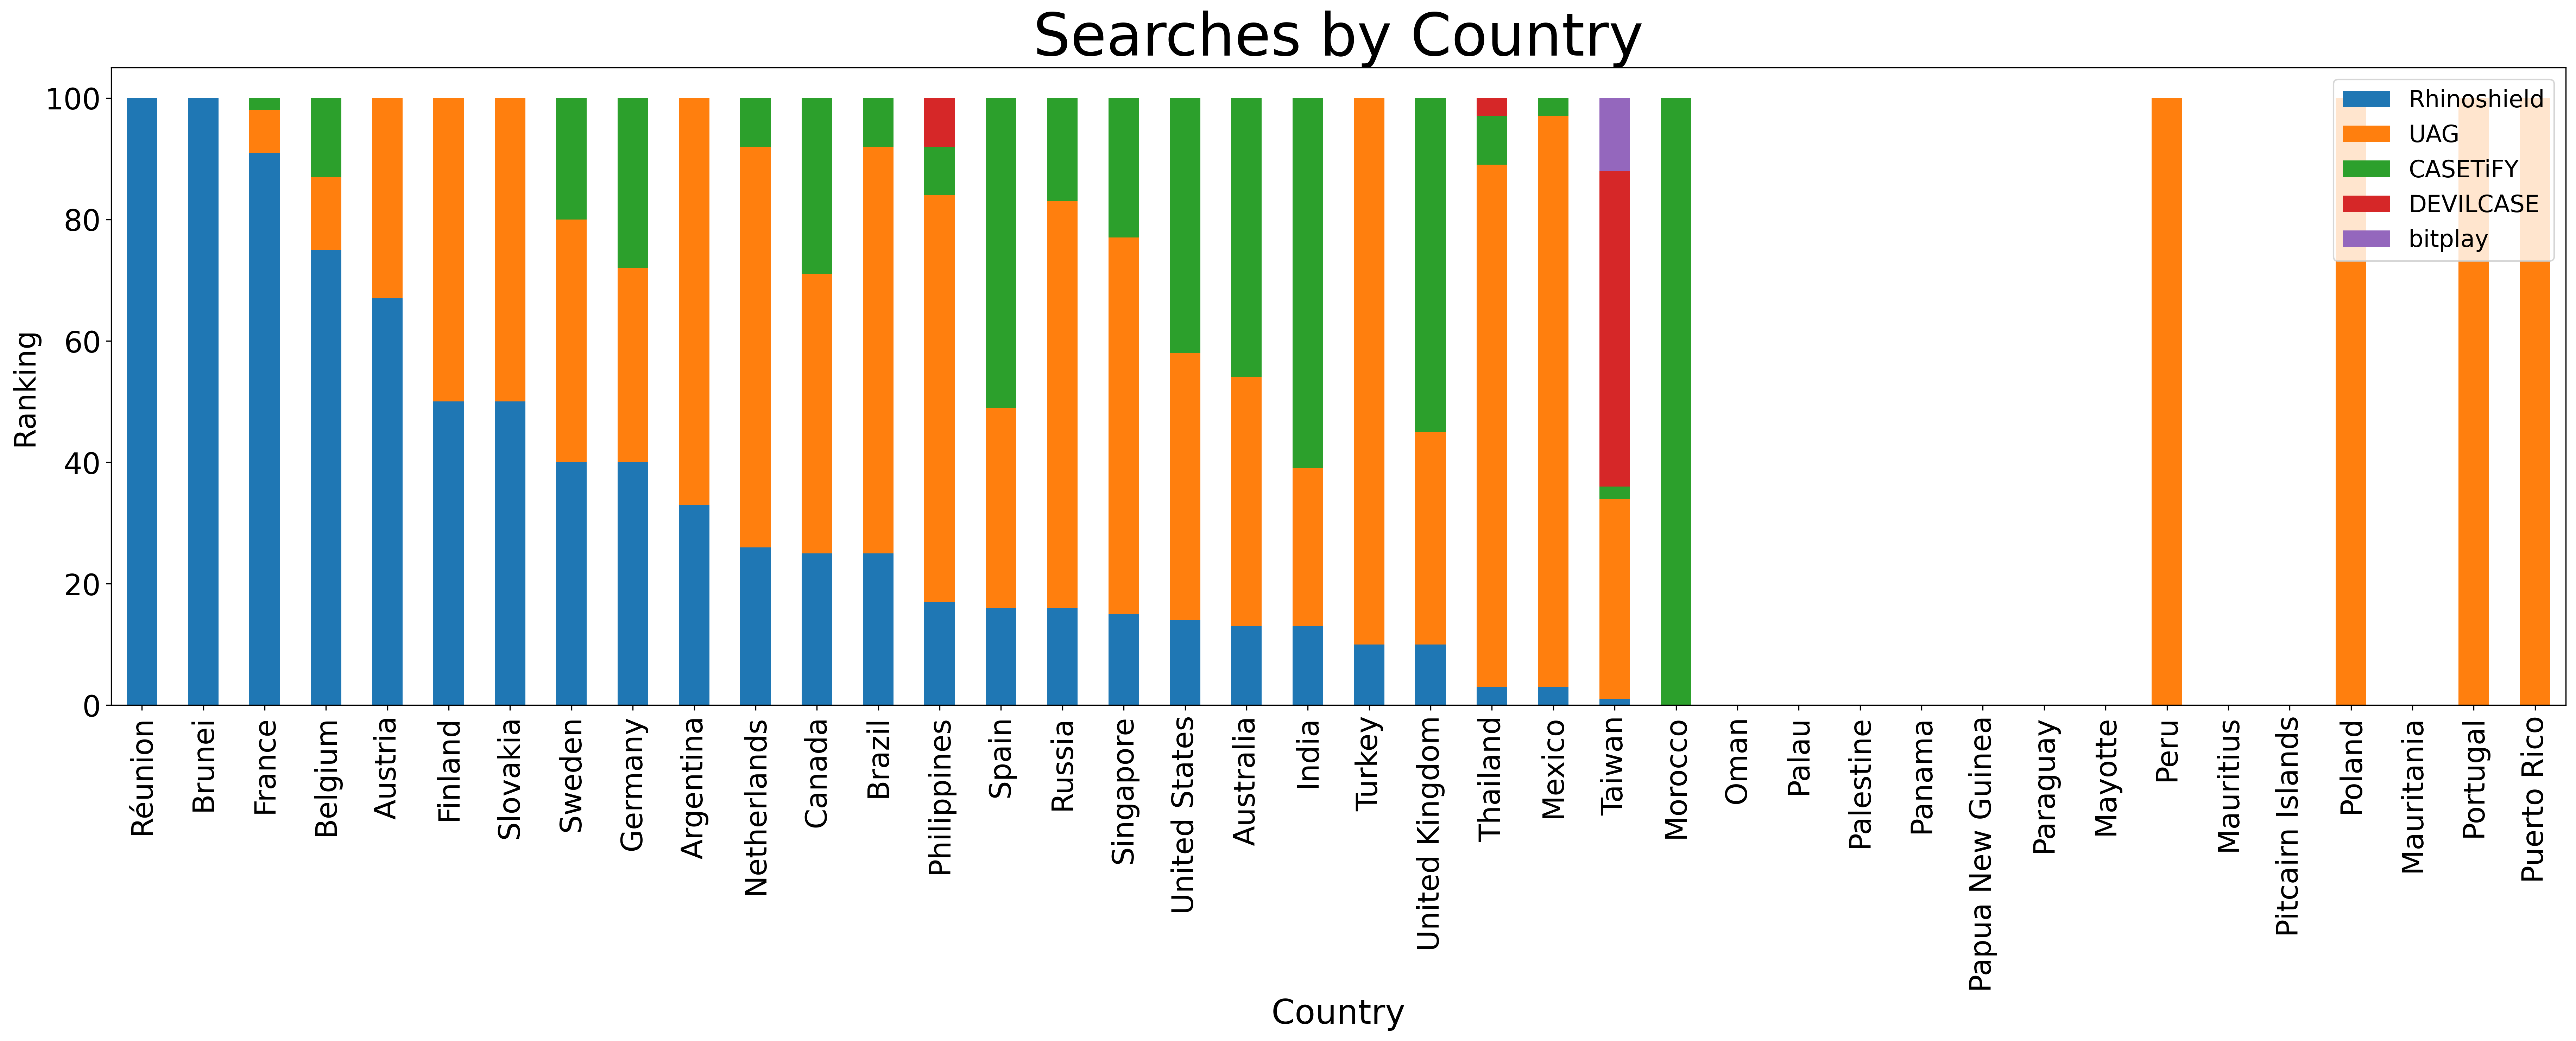

In [156]:
import matplotlib
from matplotlib import pyplot as plt

df5 = df4_ibr.sort_values('Rhinoshield', ascending=False).head(40)
df5.reset_index().plot(x='geoName', y=['Rhinoshield','UAG','CASETiFY','DEVILCASE','bitplay'], kind ='bar', stacked=True, 
                       title="Searches by Country")

plt.rcParams["figure.figsize"] = [30, 8]
plt.rcParams['figure.dpi'] = 300
plt.title("Searches by Country",fontsize = 40)
plt.legend(fontsize=16)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20, rotation=0)
plt.xlabel("Country",fontsize=23)
plt.ylabel("Ranking",fontsize=20)

#城市搜尋熱度

In [158]:
kw_list = ['犀牛盾','UAG','CASETiFY','DEVILCASE','bitplay']
pytrends.build_payload(kw_list, geo='TW')
pytrends.get_historical_interest(kw_list)

df_ibr = pytrends.interest_by_region(resolution='COUNTRY') # CITY, COUNTRY or REGION
df_ibr.sort_values('犀牛盾', ascending=False).head(20)

,犀牛盾,UAG,CASETiFY,DEVILCASE,bitplay
geoName,,,,,
Kaohsiung City,72,20,0,8,0
Taipei City,72,2,2,18,6
Taichung City,65,12,0,18,5
Taoyuan City,60,10,0,25,5
Tainan City,57,12,0,25,6
New Taipei City,53,16,0,27,4


#trending_searches:即時「夯話題」搜尋
送回一個 pandas.DataFrame 格式文件（最多20個夯話題）

In [ ]:
date = 2022
pytrends.trending_searches(pn='france')

,0
0,Celtics – Warriors
1,Lio
2,Martin Hirsch
3,Raquel Garrido
4,Beyonce
5,Sujet bac français 2022
6,Alerte canicule
7,Top Chef 2022
8,Michel Sardou
9,Mario Draghi


In [ ]:
date = 2022
pytrends.trending_searches(pn='belgium')

,0
0,Golden State Warriors
1,Vincent Janssen
2,Volbeat
3,Guerre froide
4,Maneskin
5,Recessie
6,Pinkpop
7,Brandon Wen
8,Fabio Vieira
9,US Open Golf


In [ ]:
trending_searches_df = pytrend.trending_searches(pn='taiwan')
print(trending_searches_df.head(20))

                 0
0              NBA
1               台股
2            Curry
3               體育
4   Andrew Wiggins
5              楊秀卿
6              吳宗憲
7            緯來體育台
8             富邦勇士
9             高大鮮乳
10             吳秀梅
11          全盈 PAY
12           Tatum
13             許藍方
14             福建艦
15          開發金紀念品
16     Geforce NOW
17           勇士總冠軍
18              鋼龍
19            荔枝椿象


#pytrend.related_queries
相關關鍵字

在 pytrend.related_queries 前，要先進行二個工作：

pytrend.interest_over_time()
pytrend.interest_by_region()

In [ ]:
#Get the Related Queries： get the related queries of the keyword '手機殼'

pytrend.build_payload(kw_list=['手機殼'])
related_queries_dict = pytrend.related_queries()
df7=related_queries_dict['手機殼']['top']
df8=related_queries_dict['手機殼']['rising']
display(df7)
display(df8)

,query,value
0,手 機 殼 iphone,100
1,犀牛 盾 手 機 殼,54
2,犀牛 盾,54
3,惡魔,50
4,惡魔 手 機 殼,50
5,推薦 手 機 殼,42
6,oppo 手 機 殼,29
7,uag 手 機 殼,21
8,uag,21
9,samsung 手 機 殼,15


,query,value
0,iphone11 手 機 殼,139200
1,iphone xs 手 機 殼,95250
2,iphone12 手 機 殼,94000
3,iphone 12 pro 手 機 殼,92050
4,iphone 12 pro,92050
5,xr 手 機 殼,79100
6,iphone xr 手 機 殼,73700
7,xs 手 機 殼,66550
8,iphone 8 plus 手 機 殼,62550
9,iphone 8 plus,62550


In [ ]:
#與犀牛盾品牌相關的上升中的搜尋聲量,前20名
pytrend.build_payload(kw_list=['犀牛盾'],geo='TW',timeframe='today 1-m',cat=0)
relatced_topic=pytrend.related_topics()
relatced_topic['犀牛盾']['rising'].drop(['link','topic_mid'],axis=1).head(20)


,value,formattedValue,topic_title,topic_type
0,350,+350%,Rope,Topic
1,120,+120%,Watch strap,Topic
2,80,+80%,Transparency,Topic
3,70,+70%,iPhone 13,Mobile phone
4,60,+60%,Apple iPad Air,Tablet computer
5,60,+60%,iPad Air,Tablet computer
6,60,+60%,Apple Watch,Watch
7,50,+50%,Urban Armor Gear,Topic


In [ ]:
#與犀牛盾品牌相關的搜尋量
#若與前面綜合來看，若皆無出現最近廣告詞,代表行銷沒有明顯效果
relatced_topic['犀牛盾']['top'].drop(['link','topic_mid'],axis=1).head(20)

,value,formattedValue,hasData,topic_title,topic_type
0,100,100,True,RhinoShield,Topic
1,13,13,True,Mobile Phone Case,Topic
2,6,6,True,iPhone,Mobile phone
3,4,4,True,Code,Topic
4,4,4,True,Rhinoceros,Animal
5,3,3,True,Casetify,Company
6,3,3,True,iPhone 13,Mobile phone
7,3,3,True,Shield,Topic
8,2,2,True,Transparency,Topic
9,2,2,True,Apple Watch,Watch


### 實例1：「台灣手機殼品牌，最近三個月，流行度比較分析」

In [ ]:
kw_list = ['犀牛盾','UAG','CASETiFY','DEVILCASE','bitplay','Rhinoshield']
kw_group = list(zip(*[iter(kw_list)]*1))
kw_grplist = [list(x) for x in kw_group]
kw_grplist

[['犀牛盾'], ['UAG'], ['CASETiFY'], ['DEVILCASE'], ['bitplay'], ['Rhinoshield']]

In [ ]:
#在台灣，['犀牛盾']比起['Rhinoshield']較廣為人知
from pytrends.request import TrendReq
import pytrends
import pandas as pd
trendshow = TrendReq(hl='en-US', tz=360)

dict = {}
i = 0
for kw in kw_grplist:
    trendshow.build_payload(kw, timeframe = 'today 3-m', geo='TW')
    dict[i] = trendshow.interest_over_time()
    i += 1

trendframe = pd.concat(dict, axis=1)
trendframe.columns = trendframe.columns.droplevel(0)
trendframe = trendframe.drop('isPartial', axis = 1)
trendframe

,犀牛盾,UAG,CASETiFY,DEVILCASE,bitplay,Rhinoshield
date,,,,,,
2022-03-17,60,40,33,56,74,56
2022-03-18,70,57,39,18,0,30
2022-03-19,89,54,62,20,0,0
2022-03-20,100,55,53,100,0,100
2022-03-21,58,48,41,26,39,0
...,...,...,...,...,...,...
2022-06-11,52,44,43,26,62,0
2022-06-12,56,30,22,27,42,0
2022-06-13,46,13,35,15,18,27


### 實例2：「美國手機殼品牌，最近三個月，流行度比較分析」

In [ ]:
for kw in kw_grplist:
    trendshow.build_payload(kw, timeframe = 'today 3-m', geo='US', cat=1180)
    dict[i] = trendshow.interest_over_time()
    i += 1

In [ ]:
import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.offline as pyo

init_notebook_mode(connected=True)

trace = [go.Scatter(
x = trendframe.index,
y = trendframe[col], name=col) for col in trendframe.columns]

data = trace
layout = go.Layout(title='「美國手機殼品牌，最近三個月，流行度比較分析」', showlegend=True)
fig = go.Figure(data=data, layout=layout)

#iplot(fig)
fig.show(renderer="colab")

實例6: 針「手機殼」，一次整理好：話題聲量，話題趨勢，建議使用關鍵字。

In [ ]:
from pytrends.request import TrendReq

# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()

kw_list1=['Rhinoshield','犀牛盾','惡魔手機殼','推薦手機殼']

# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
pytrend.build_payload(kw_list=kw_list1,timeframe='2022-01-01 2022-05-31',geo='TW')

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
print("(1)==================================================")
print("interest_over_time_df.tail()：")
print(interest_over_time_df.tail())

# Interest by Region
interest_by_region_df = pytrend.interest_by_region()
print("(2)==================================================")
print("interest_by_region_df.head()：")
print(interest_by_region_df.head())

# Related Queries, returns a dictionary of dataframes
related_queries_dict = pytrend.related_queries()
print("(3)==================================================")
print("related_queries_dict：")
print(related_queries_dict)

# Get Google Hot Trends data
trending_searches_df = pytrend.trending_searches()
print("(4)==================================================")
print("trending_searches_df.head()：")
print(trending_searches_df.head())

# Get Google Hot Trends data
today_searches_df = pytrend.today_searches()
print("(5)==================================================")
print("today_searches_df.head()：")
print(today_searches_df.head())

# Get Google Top Charts
top_charts_df = pytrend.top_charts(2021, hl='en-US', tz=360, geo='TW')
print("(6)==================================================")
print("top_charts_df.head()：")
print(top_charts_df.head())

# Get Google Keyword Suggestions
suggestions_dict = pytrend.suggestions(keyword='手機殼')
print("(7)==================================================")
print("suggestions_dict：")
print(suggestions_dict)

(1)==================================================
interest_over_time_df.tail()：
            Rhinoshield  犀牛盾  惡魔手機殼  推薦手機殼  isPartial
date                                                 
2022-05-27            0   43      9      4      False
2022-05-28            4   45     12      6      False
2022-05-29            0   35     11      5      False
2022-05-30            1   34      5      1      False
2022-05-31            1   40      9      2      False
(2)==================================================
interest_by_region_df.head()：
                 Rhinoshield  犀牛盾  惡魔手機殼  推薦手機殼
geoName                                        
Kaohsiung City             2   98      0      0
New Taipei City            2   98      0      0
Taichung City              3   97      0      0
Tainan City                1   99      0      0
Taipei City                3   97      0      0
(3)==================================================
related_queries_dict：
{'Rhinoshield': {'top':               quer